In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from rdkit import Chem
from rdkit.Chem import Descriptors
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec


In [2]:
# Read dataset
data = pd.read_csv('./HIV.csv')
data.head(10)

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0
5,CCOP(=O)(Nc1cccc(Cl)c1)OCC,CI,0
6,O=C(O)c1ccccc1O,CI,0
7,CC1=C2C(=COC(C)C2C)C(O)=C(C(=O)O)C1=O,CI,0
8,O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...,CI,0
9,O=[N+]([O-])c1ccccc1SSc1ccccc1[N+](=O)[O-],CI,0


In [3]:
# Generating  word embedding to the substructures of a molecule
# Inspired by https://towardsdatascience.com/basic-molecular-representation-for-machine-learning-b6be52e9ff76

data['mol'] = data['smiles'].apply(lambda x: Chem.MolFromSmiles(x))
print(">>> create sentence from mol ... ")
data['sentence'] = data.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], radius=1)), axis=1)

print(">>> load the word2vec model ... ")
w2v_model = word2vec.Word2Vec.load('model_300dim.pkl')

print(">>> create embedding from sentence ... ")
data['embedding'] = [DfVec(x) for x in sentences2vec(data['sentence'], w2v_model)]

hiv_mol2vec = np.array([x.vec for x in data['embedding']])
hiv_mol2vec = pd.DataFrame(hiv_mol2vec)

hiv_mol2vec.head(10)

>>> create sentence from mol ... 
>>> load the word2vec model ... 


C:\Users\maitr\anaconda3\envs\my-rdkit-env\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


>>> create embedding from sentence ... 


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.578654,2.969831,-1.355018,-0.007029,4.534556,2.134673,-8.292525,-0.340837,1.235984,1.795556,...,-0.883459,0.559239,6.128768,-3.908396,-5.427999,0.389158,-4.306901,-1.922331,-4.977272,-4.454784
1,0.582014,-0.608330,-5.723546,11.420366,1.116713,-0.251324,-19.153555,0.641661,12.026267,11.621690,...,-7.454680,10.781548,16.960247,-2.589879,-11.752159,-4.273149,-9.089891,-1.927983,-11.291155,0.078293
2,0.239901,-3.120830,-3.069606,6.872059,-0.438361,-2.307343,-9.542530,0.802866,8.061898,3.624429,...,-0.937189,9.778188,9.964662,-0.317403,-6.865175,-1.519423,-3.289854,-3.003499,-8.488753,-0.337102
3,2.331327,-0.651370,-6.820276,4.460179,2.888736,2.596256,-10.667131,1.601155,7.585736,9.250560,...,-1.775050,9.360443,10.512185,-0.767903,-10.444510,-4.038017,-8.307643,-1.430080,-11.372781,-2.125236
4,1.245269,-2.941263,-0.752463,-0.470454,1.706033,1.063615,-3.766093,2.574552,3.772649,3.572893,...,-0.251756,3.133073,2.865110,-0.975226,-4.454810,-2.266666,-4.889390,-2.214254,-4.428329,-1.573864
5,1.517411,-0.614370,-0.137746,8.954222,-0.948801,-0.775231,-6.088184,-2.620385,8.403460,1.148298,...,-2.865462,5.722611,9.245647,-0.042817,-3.556453,-2.001752,-3.677051,0.760991,-4.586889,-2.716576
6,0.456545,0.275523,-1.782677,1.315240,-0.304189,0.188262,-5.266070,0.162359,2.533442,2.168227,...,-1.730013,3.998163,4.613942,1.332048,-3.041878,-0.763584,-2.051678,-1.806924,-4.559721,-0.173204
7,2.027612,-0.774295,-5.157510,-1.372895,2.015461,-1.046374,-6.396633,-0.064219,-0.271083,-0.745309,...,-1.333411,7.664080,3.649797,2.073838,-8.021379,-5.572824,-5.080699,-4.334765,-8.631624,0.083798
8,2.481286,2.027296,-4.738200,2.988347,-6.899083,3.268264,-14.939203,3.181320,4.329031,6.946989,...,2.894495,12.301370,12.193259,-4.371844,-7.416194,-1.012176,-4.842823,-7.240359,-6.478294,-0.379972
9,1.537480,0.318909,-3.072425,4.728422,-4.274062,1.597488,-10.530087,2.044068,5.535030,4.849358,...,0.841765,8.253634,9.924977,-2.090944,-4.468174,-0.247746,-3.251008,-4.446618,-5.393043,0.118545


In [4]:
X = hiv_mol2vec
Y = data['HIV_active']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
sc=StandardScaler()
scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [5]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(trainX_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=300)

In [6]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

print('F1-score: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.97
F1-score: 0.34


C:\Users\maitr\anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


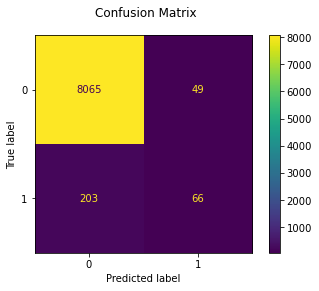

In [7]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8114
           1       0.57      0.25      0.34       269

    accuracy                           0.97      8383
   macro avg       0.77      0.62      0.66      8383
weighted avg       0.96      0.97      0.96      8383



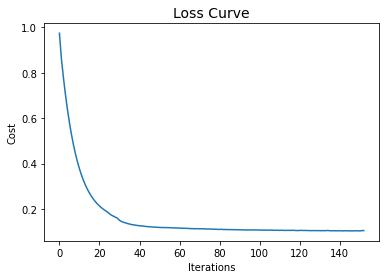

In [9]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, y_train)
print(grid.best_params_) 
grid_predictions = grid.predict(testX_scaled) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, grid_predictions)))